In [4]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [5]:
#Fetching data for further analysis and to show comparison between 2019 March and 2020 March because Covid impact started from March 2020. 
mar19 = pd.read_csv(r'2019 data\201903-capitalbikeshare-tripdata.csv')
mar20 = pd.read_csv(r'2020 data\202003-capitalbikeshare-tripdata.csv')

In [6]:
#Concating Two datasets in One.
march= pd.concat([mar19, mar20])
march.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,896,2019-03-01 00:02:23,2019-03-01 00:17:19,31234,20th & O St NW / Dupont South,31306,39th & Calvert St NW / Stoddert,W01259,Member
1,613,2019-03-01 00:03:10,2019-03-01 00:13:23,31323,Woodley Park Metro / Calvert St & Connecticut ...,31214,17th & Corcoran St NW,W22263,Member
2,652,2019-03-01 00:04:14,2019-03-01 00:15:06,31651,11th & Park Rd NW,31506,1st & Rhode Island Ave NW,W00825,Member
3,676,2019-03-01 00:05:11,2019-03-01 00:16:27,31400,Georgia & New Hampshire Ave NW,31212,21st & M St NW,W24162,Member
4,587,2019-03-01 00:08:04,2019-03-01 00:17:51,31293,31st & Water St NW,31250,20th & L St NW,W21644,Member


In [7]:
#Seperating Date and Year from the 'Start Date'. 
march["Date"] = pd.to_datetime(march["Start date"]).dt.date
march["Year"] = pd.to_datetime(march["Start date"]).dt.year
march['month_day'] = pd.to_datetime(march["Start date"]).dt.strftime('%m-%d')

In [10]:
# Visualization to show difference between 2019 March and 2020 March. 
df = march.groupby(["month_day","Year"]).size()
df= df.reset_index()
df.columns=["Date","year","Count"]
df.head()

,Date,year,Count
0,03-01,2019,4069
1,03-01,2020,5322
2,03-02,2019,5371
3,03-02,2020,7666
4,03-03,2019,2309


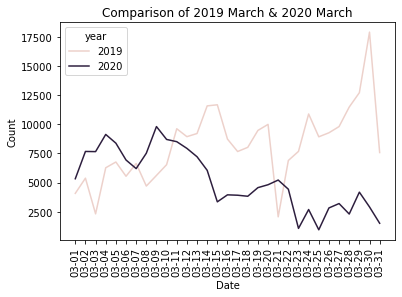

In [16]:
#Plotting the same in Line Plot for better view
sns.lineplot(data = df,x="Date",y="Count",hue="year")
plt.title('Comparison of 2019 March & 2020 March')
plt.xticks(rotation=90);
#The below graph clearly shows that March 2019 was far better in termes of renting a bike and after 2020 March 09th there was a downfall of renting the bike because that was the time where lockdown in most of the countries took place. 

In [17]:
# Comparison of both the years and thereafter plotting in Bar Graph visualization.

df2 = march.groupby(["Year"]).size()
df2= df2.reset_index()
df2.columns=["Year", "Count"]
df2

,Year,Count
0,2019,253811
1,2020,162530


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

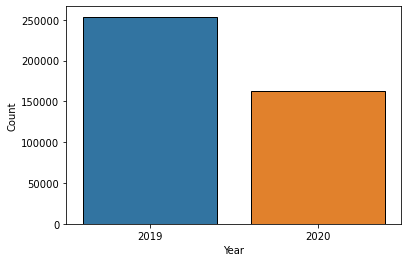

In [21]:
sns.barplot(x='Year', y='Count', data=df2, edgecolor='Black')
plt.plot